## Part 1: Data Understanding

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import time
import re
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
from IPython.display import display

# statistical test
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

# train test split
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.base import clone

#feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# ML algorithm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score, make_scorer, roc_auc_score
from sklearn.metrics import  classification_report, confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.utils.class_weight import compute_sample_weight
import shap

# Model Wrapper and Deployment
import pickle
import streamlit as st

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Loading the Dataset

Dataset is downloaded from [kaggle.com](https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction)

In [2]:
# loading dataset
df = pd.read_csv('booking.csv')

# display table
display(df.head(),df.tail())

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
36284,INN36286,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


### Features Description


| Feature                               | Description                                           |
| -----                                 | ----                                                  |
| **Booking_ID**                        | Unique identifier for each booking.                   |
| **number of adults**                  | Number of adults included in the booking.             |
| **number of children**                | Number of children included in the booking.           |
| **number of weekend nights**          | Number of weekend nights included in the booking.     |
| **number of week nights**             | Number of week nights included in the booking.        |
|**type of meal** |Type of meal included in the booking. |
| **car parking space**                 | Indicates whether a car parking space was requested or included in the booking.                 |
| **room type**                         | Type of room booked.                                  |
| **lead time**                  | Number of days between the booking date and the arrival date.              |
| **market segment type**                        | Type of market segment associated with the booking.                | 
| **repeated**                      | Indicates whether the booking is a repeat booking.       | 
| **P-C**                      | Number of previous bookings that were canceled by the customer prior to the current booking.                             | 
| **P-not-C**                      | Number of previous bookings not canceled by the customer prior to the current booking. | 
| **average price**                    | Average price associated with the booking.                             |
| **special requests**                    | Number of special requests made by the guest.                             |
| **date of reservation**                    | Date of the reservation.                             |
| **booking status**                    | Status of the booking ( canceled or not canceled).                             |

### Dataset Shape

In [3]:
print("Dataset shape (rows, columns):", df.shape)

Dataset shape (rows, columns): (36285, 17)


### Data Cleaning

#### Check Data Variable

In [4]:
# displaying variable type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

#### Unique Values

In [5]:
listItem = []
for col in df.columns:
    unique_values = df[col].drop_duplicates().dropna().values
    if len(unique_values) <= 10:
        unique_sample = list(unique_values)
    else:
        unique_sample = list(pd.Series(unique_values).sample(10).values)

    listItem.append([
        col,
        df[col].dtype,
        df[col].nunique(dropna=True),
        unique_sample
    ])

# Create pandas dataframe for unique values of each column
dfDesc = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'unique', 'uniqueSample'],
    data=listItem
)

# Increase maximum column width
pd.set_option('display.max_colwidth', None)

display(dfDesc)

# Reset display to default level
pd.reset_option('display.max_colwidth')

,dataFeatures,dataType,unique,uniqueSample
0,Booking_ID,object,36285,"[INN30648, INN30820, INN08123, INN10510, INN09100, INN13836, INN18225, INN03408, INN29324, INN28794]"
1,number of adults,int64,5,"[1, 2, 3, 0, 4]"
2,number of children,int64,6,"[1, 0, 2, 3, 10, 9]"
3,number of weekend nights,int64,8,"[2, 1, 0, 4, 3, 6, 5, 7]"
4,number of week nights,int64,18,"[16, 6, 5, 15, 3, 7, 12, 8, 17, 0]"
5,type of meal,object,4,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal Plan 3]"
6,car parking space,int64,2,"[0, 1]"
7,room type,object,7,"[Room_Type 1, Room_Type 4, Room_Type 2, Room_Type 6, Room_Type 5, Room_Type 7, Room_Type 3]"
8,lead time,int64,352,"[295, 191, 22, 299, 242, 110, 24, 139, 11, 169]"
9,market segment type,object,5,"[Offline, Online, Corporate, Aviation, Complementary]"


In [6]:
# replacing booking status label into 1 and/or 0
df['booking status'] = df['booking status'].replace({"Not_Canceled": 0, "Canceled": 1})

In [7]:
# Convert categorical variables with limited unique values to category type for memory efficiency
categorical_columns = [
    'type of meal',           # 4 unique values
    'room type',             # 7 unique values
    'market segment type',   # 5 unique values
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

In [8]:
# convert date of reservation to datetime (handles mixed formats and invalid dates)
df['date of reservation'] = pd.to_datetime(df['date of reservation'], format='mixed', errors='coerce')

# check for any invalid dates that were converted to NaT
print(f"Invalid dates converted to NaT: {df['date of reservation'].isna().sum()}")

Invalid dates converted to NaT: 37


#### Check Variable Type after Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36285 non-null  object        
 1   number of adults          36285 non-null  int64         
 2   number of children        36285 non-null  int64         
 3   number of weekend nights  36285 non-null  int64         
 4   number of week nights     36285 non-null  int64         
 5   type of meal              36285 non-null  category      
 6   car parking space         36285 non-null  int64         
 7   room type                 36285 non-null  category      
 8   lead time                 36285 non-null  int64         
 9   market segment type       36285 non-null  category      
 10  repeated                  36285 non-null  int64         
 11  P-C                       36285 non-null  int64         
 12  P-not-C           

### Data Duplicates

In [10]:
# Find the count of duplicated rows
print(f"Total number of duplicated rows: {df[df.duplicated()].shape[0]}")

Total number of duplicated rows: 0


In [11]:
# Drop duplicated rows
df = df.drop_duplicates()

# Verifying the duplicated rows after dropping them
print(f"Total number of duplicated rows after dropping them: {df[df.duplicated()].shape[0]}")

Total number of duplicated rows after dropping them: 0


### Dropping Unnecessary Features

In [12]:
# dropping Booking_ID column from dataframe
df.drop(['Booking_ID'],axis=1, inplace=True)

## Part 2: Exploratory Data Analysis

### Creating Custom Color Map

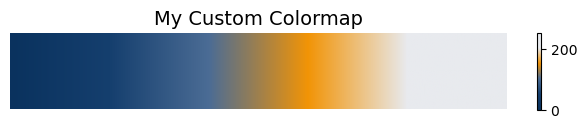

In [13]:
# custom colors in HEX format
colors = ["#0a325e", "#153f6e", "#4b6c95", "#f29406", "#e8eaee", "#e8eaee"]

# Create the custom LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("my_custom_cmap", colors, N=256)

# Visualize the custom colormap
plt.figure(figsize=(8, 1))
plt.imshow([range(256)], aspect='auto', cmap=custom_cmap)
plt.colorbar()
plt.title("My Custom Colormap", fontsize=14)
plt.axis('off')  # Remove axis for better visual
plt.show()

### Missing Data

In [14]:
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})

display(missing_df)

,Missing Values,Percentage (%)
number of adults,0,0.0
number of children,0,0.0
number of weekend nights,0,0.0
number of week nights,0,0.0
type of meal,0,0.0
car parking space,0,0.0
room type,0,0.0
lead time,0,0.0
market segment type,0,0.0
repeated,0,0.0


### Matrix and Heatmap Visualization of Missing Data

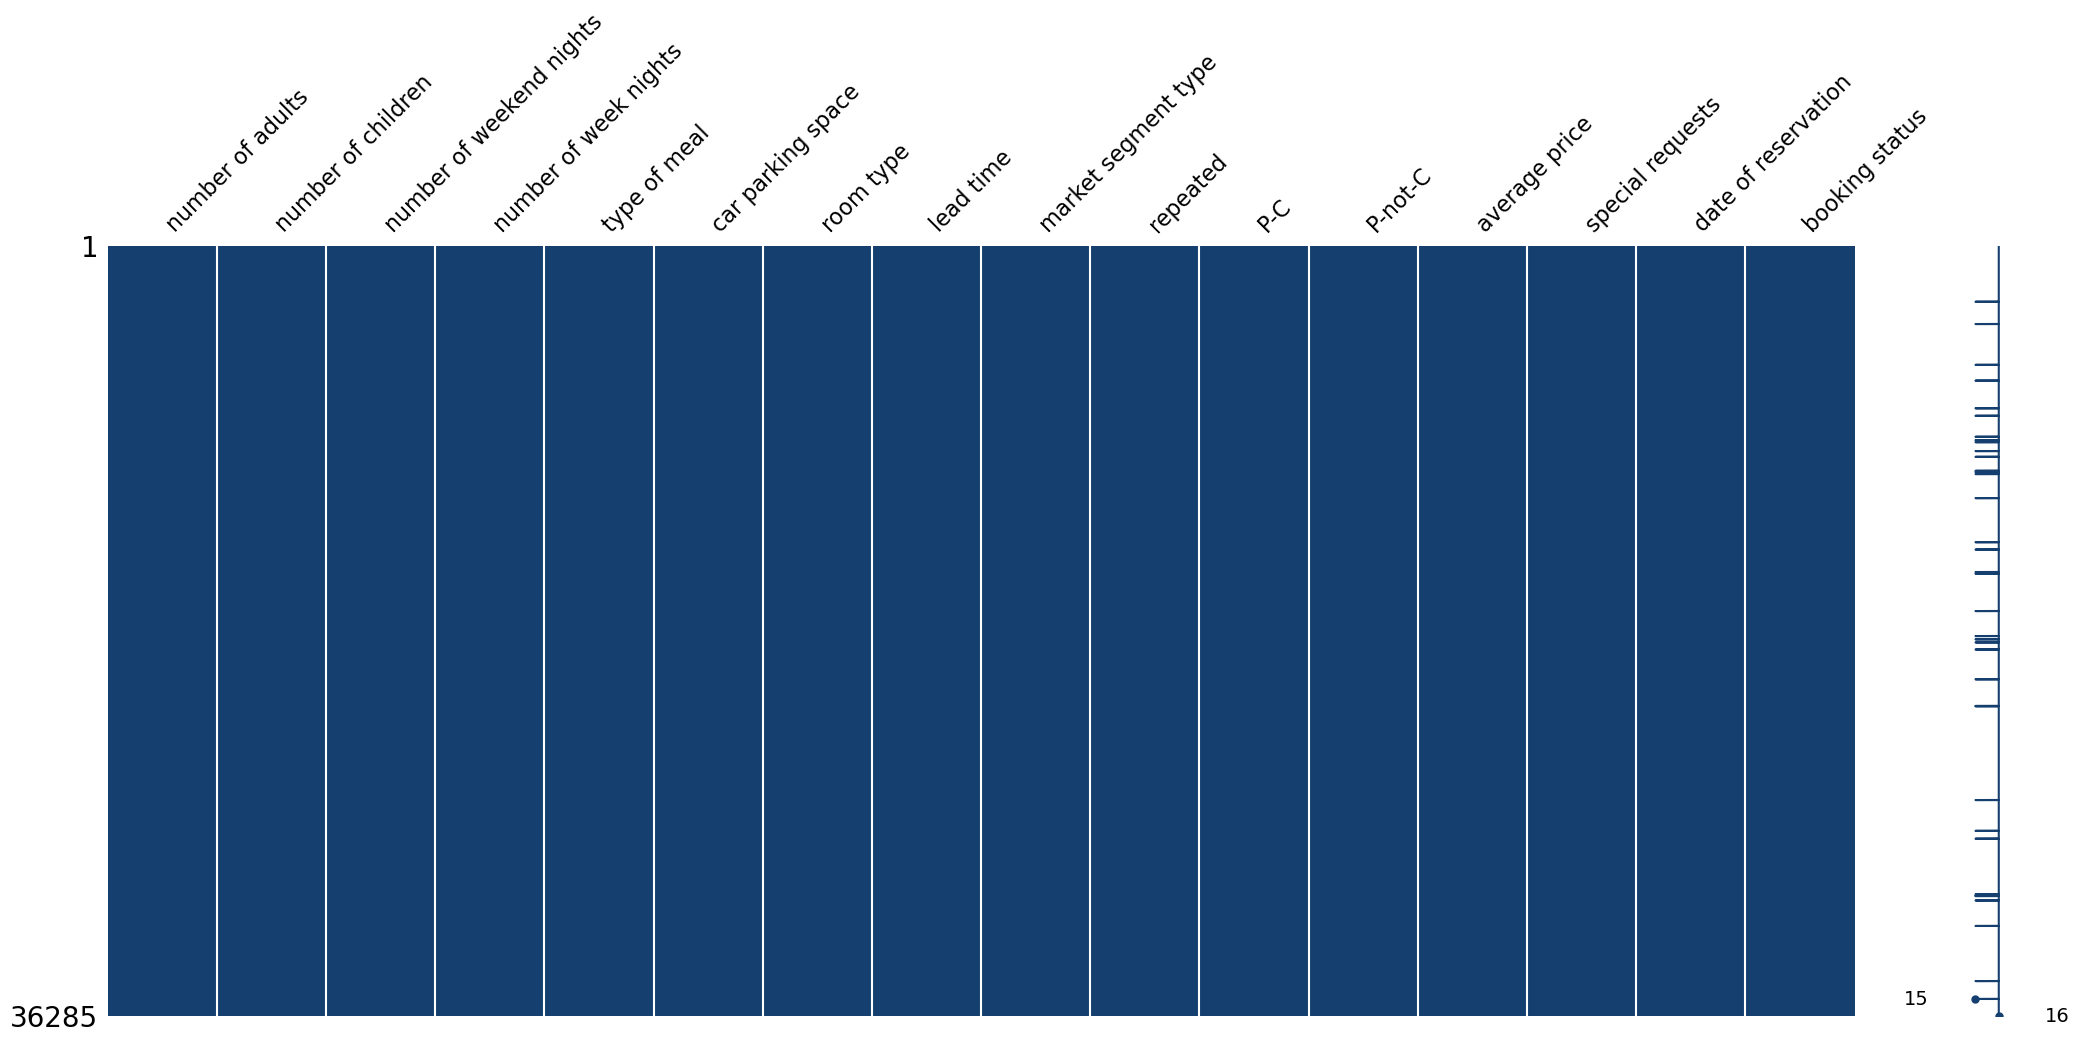

In [15]:
missingno.matrix(df, color=(0.08235294117647059, 0.24705882352941178, 0.43137254901960786))
plt.show()

### Handling of Missing Data

In [16]:
# Drop rows with invalid dates (NaT values)
df = df.dropna(subset=['date of reservation'])

print(f"Dataset shape after removing invalid dates: {df.shape}")

Dataset shape after removing invalid dates: (36248, 16)


### Feature Engineering

In [17]:
# Extract useful temporal features from date of reservation
df['reservation_year'] = df['date of reservation'].dt.year
df['reservation_month'] = df['date of reservation'].dt.month
df['reservation_day_of_week'] = df['date of reservation'].dt.dayofweek  # 0=Monday, 6=Sunday
df['reservation_quarter'] = df['date of reservation'].dt.quarter
df['reservation_is_weekend'] = df['date of reservation'].dt.dayofweek.isin([5, 6]).astype(int)

# Drop the original date column after feature extraction
df = df.drop(columns=['date of reservation'])

In [18]:
df.shape

(36248, 20)

### Target Variable Analysis and Visualization

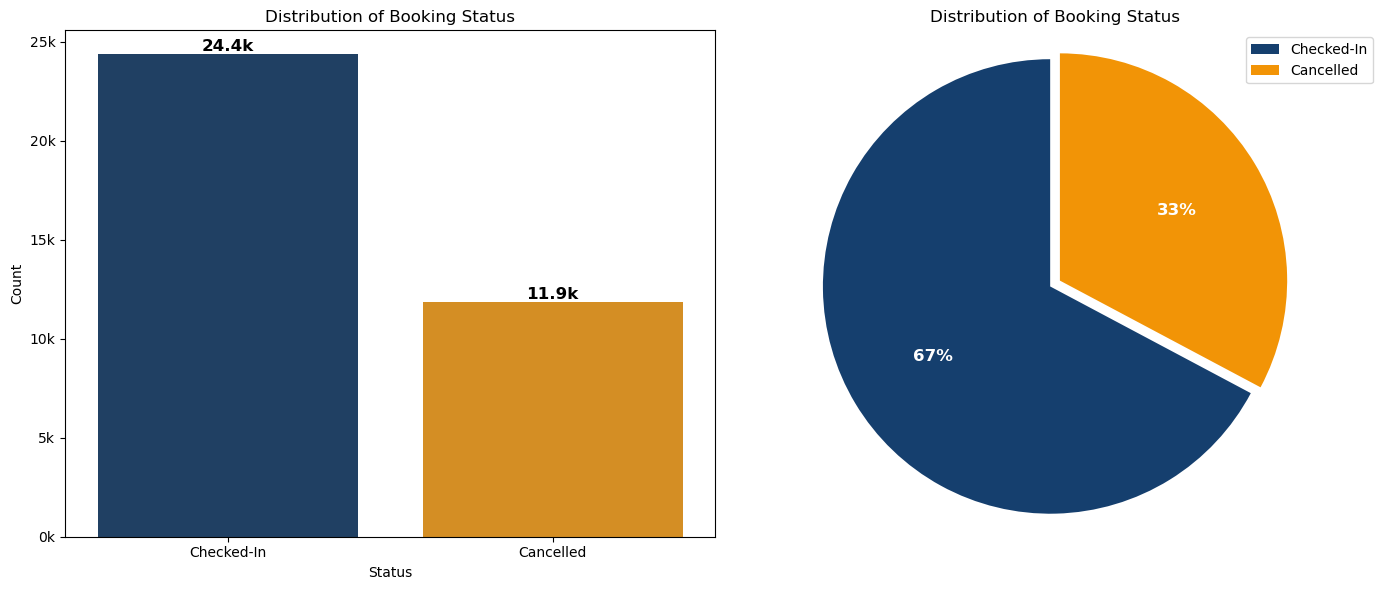

In [19]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#  Subplot 1: Bar Chart (Countplot) 
ax = sns.countplot(
    x='booking status', 
    data=df, 
    palette=["#153f6e", "#f29406"], 
    ax=axes[0]
)

axes[0].set_title('Distribution of Booking Status')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Checked-In', 'Cancelled'])

# Format y-axis to show 1k, 2k, etc.
axes[0].yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k')
)

# Calculate percentages and annotate each bar
total = len(df)
for p in ax.patches:
    percentage = f'{round(p.get_height() / 1000, 1)}k'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[0].annotate(
        percentage, 
        (x, y), 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

#  Subplot 2: Pie Chart 
target_counts = df['booking status'].value_counts()

axes[1].pie(
    target_counts, 
    autopct='%1.0f%%', 
    startangle=90, 
    colors=["#153f6e", "#f29406"],
    explode=[0, 0.05],
    textprops={'fontweight': 'bold', 'fontsize':12, 'color':'white'}  # Make pie slice labels bold and size 12
)
axes[1].set_title('Distribution of Booking Status')
axes[1].legend(['Checked-In', 'Cancelled'], loc='best')
axes[1].axis('equal')  # Ensures the pie is drawn as a circle

plt.tight_layout()
plt.show()

### Correlation Analysis and Visualization

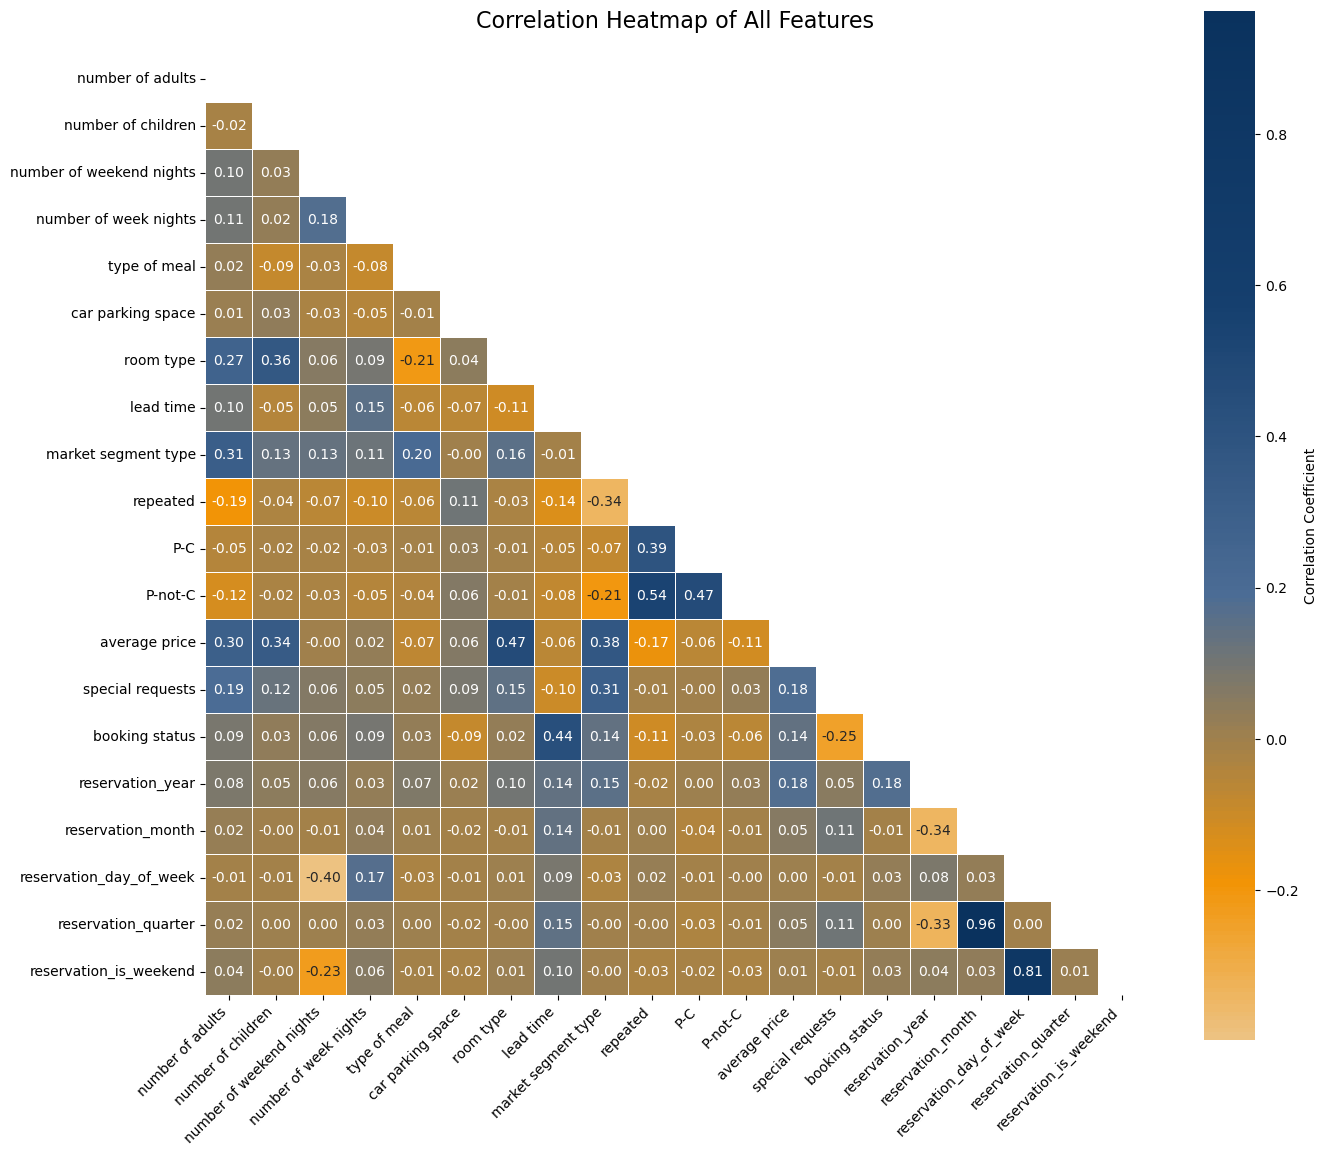


Features Correlation with Booking Status (sorted by absolute value):
lead time                     :  0.4386
special requests              : -0.2534
reservation_year              :  0.1794
average price                 :  0.1426
market segment type           :  0.1357
repeated                      : -0.1075
number of week nights         :  0.0927
number of adults              :  0.0865
car parking space             : -0.0860
number of weekend nights      :  0.0616
P-not-C                       : -0.0600
P-C                           : -0.0339
number of children            :  0.0330
reservation_day_of_week       :  0.0303
reservation_is_weekend        :  0.0295
type of meal                  :  0.0266
room type                     :  0.0232
reservation_month             : -0.0120
reservation_quarter           :  0.0009


In [20]:
# Create a copy of the dataframe for correlation analysis
df_corr = df.copy()

# Convert categorical variables to numeric codes for correlation
for col in df_corr.select_dtypes(include=['category']).columns:
    df_corr[col] = df_corr[col].cat.codes

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create figure
plt.figure(figsize=(14, 12))

# Create heatmap with mask
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap=custom_cmap.reversed(),
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation Heatmap of All Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Display correlation with booking status sorted by absolute value
booking_status_corr = corr_matrix['booking status'].drop('booking status').sort_values(key=abs, ascending=False)
print("\nFeatures Correlation with Booking Status (sorted by absolute value):")
print("="*60)
for feature, corr_val in booking_status_corr.items():
    print(f"{feature:30s}: {corr_val:7.4f}")

In [21]:
# Listing features to keep for future use
features_to_keep = [
    # Tier 1: Strong predictors
    'lead time',
    'special requests',
    'reservation_year',
    'average price',
    'market segment type',
    'repeated',

    # Tier 2: Moderate predictors
    'number of week nights',
    'number of adults',
    'car parking space',
    'number of weekend nights',
    'P-not-C',
    'booking status'
]

df = df[features_to_keep]
df.shape

(36248, 12)

In [22]:
df.columns

Index(['lead time', 'special requests', 'reservation_year', 'average price',
       'market segment type', 'repeated', 'number of week nights',
       'number of adults', 'car parking space', 'number of weekend nights',
       'P-not-C', 'booking status'],
      dtype='object')

### Numerical Features Analysis and Visualizations

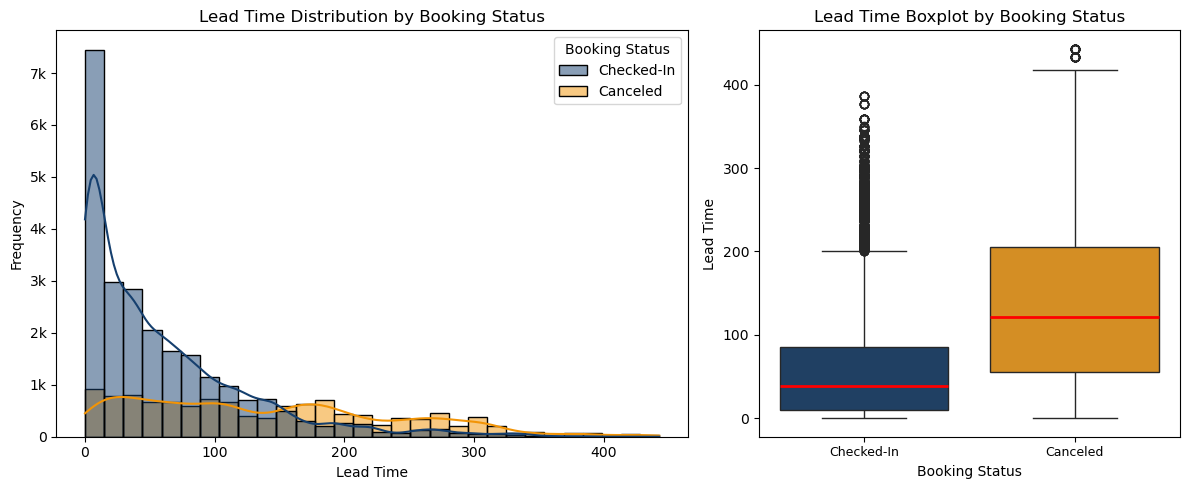

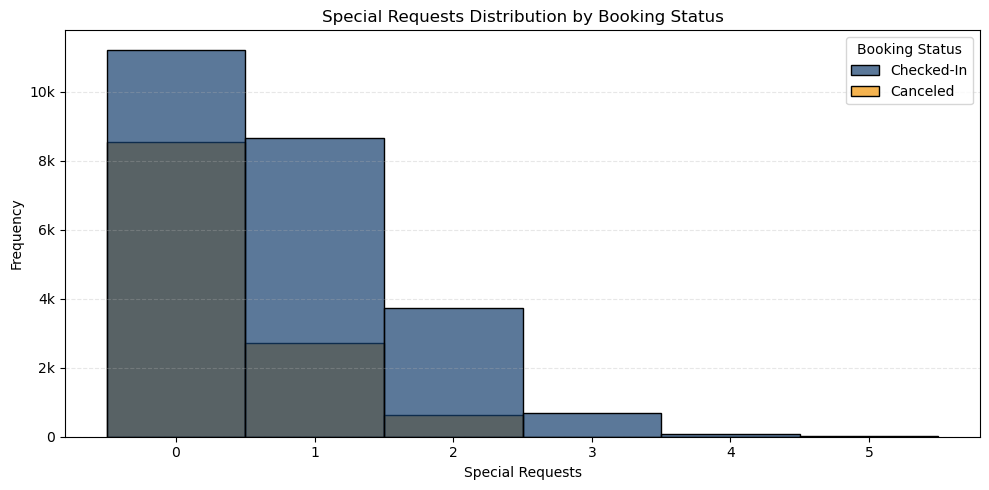

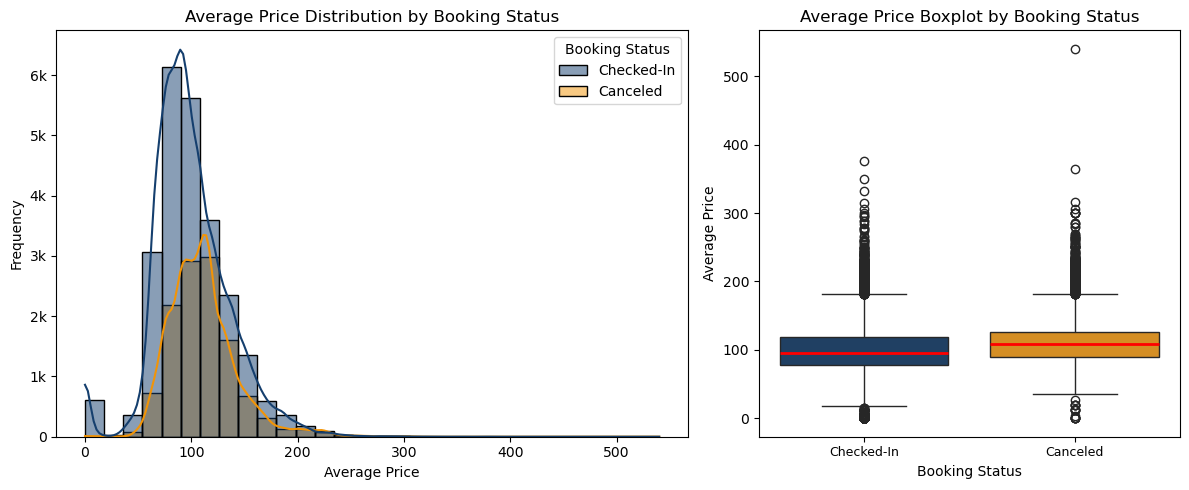

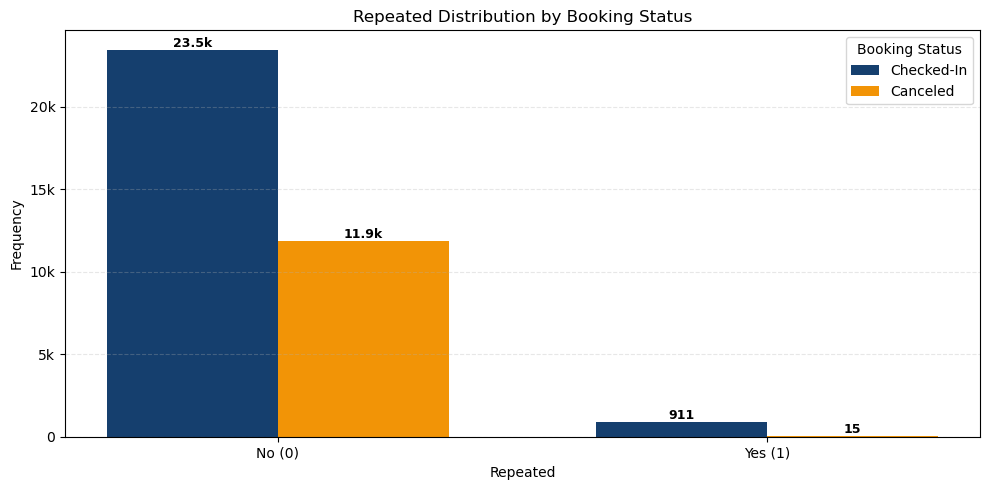

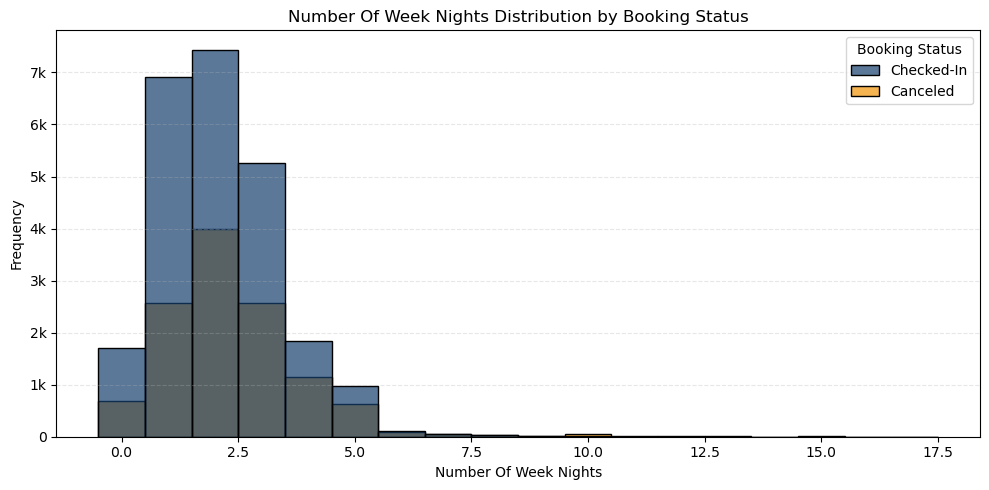

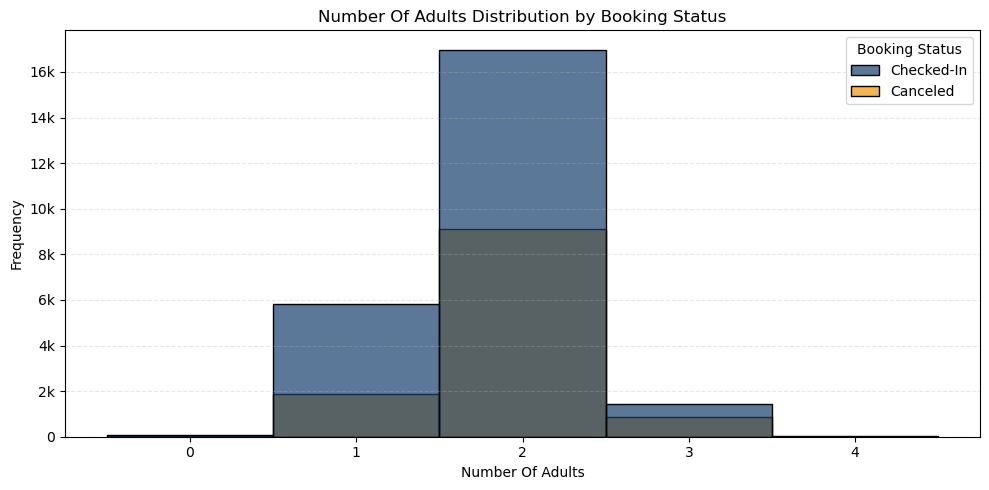

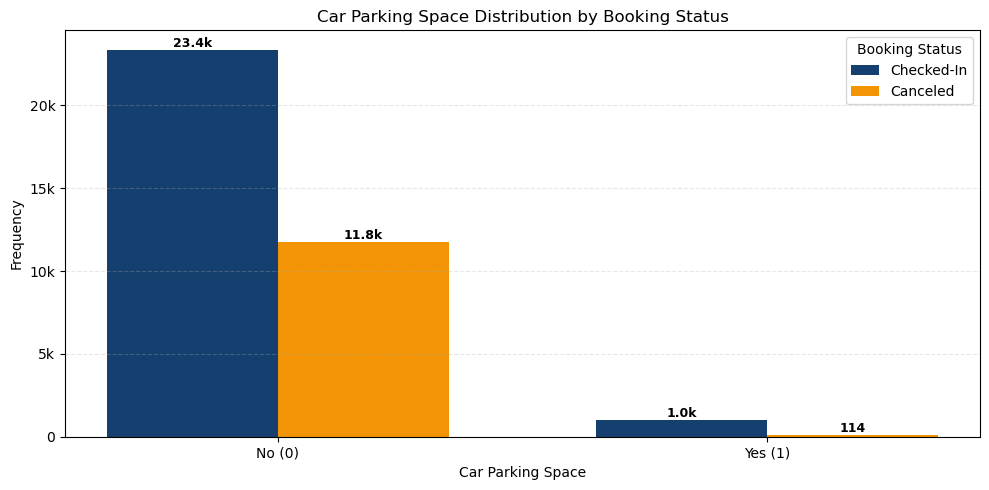

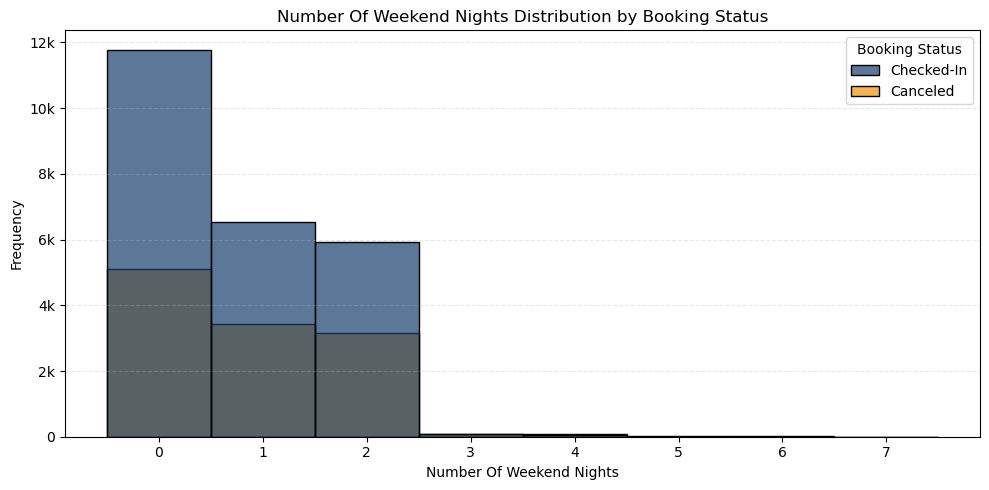

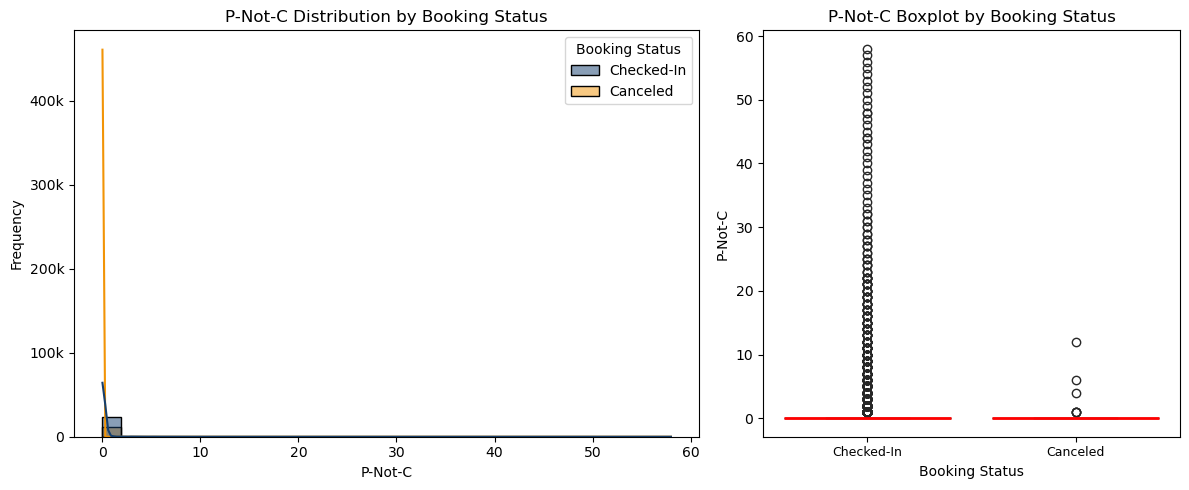

In [23]:
# Select numerical features
num_cols = df.drop(columns=["booking status"]).select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in num_cols:
    # Determine feature type
    n_unique = df[col].nunique()
    is_binary = n_unique == 2 and set(df[col].unique()).issubset({0, 1})
    is_discrete = df[col].dtype == 'int64' and n_unique < 50
    
    # Decide if we need boxplot (only for continuous features with many unique values)
    show_boxplot = not (is_binary or is_discrete)
    
    # Create subplot layout
    if show_boxplot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={"width_ratios": [3, 2]})
        ax_dist = axes[0]
        ax_box = axes[1]
    else:
        fig, ax_dist = plt.subplots(1, 1, figsize=(10, 5))
        ax_box = None
    
    # Left plot: Distribution visualization
    if is_binary:
        # For binary features (0/1) - use grouped bar chart
        df_binary = df.groupby([col, 'booking status']).size().reset_index(name='count')
        
        x_pos = np.arange(2)  # 0 and 1
        bar_width = 0.35
        
        for status_val, offset, color, label in [
            (0, -bar_width/2, "#153f6e", 'Checked-In'),
            (1, bar_width/2, "#f29406", 'Canceled')
        ]:
            counts = []
            for val in [0, 1]:
                mask = (df_binary[col] == val) & (df_binary['booking status'] == status_val)
                count = df_binary.loc[mask, 'count'].values[0] if mask.any() else 0
                counts.append(count)
            
            bars = ax_dist.bar(x_pos + offset, counts, width=bar_width, color=color, label=label)
            
            # Add count labels on bars
            for bar in bars:
                height = bar.get_height()
                label_text = f'{int(height)}' if height < 1000 else f'{height/1000:.1f}k'
                ax_dist.text(bar.get_x() + bar.get_width()/2., height,
                           label_text, ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        ax_dist.set_xticks(x_pos)
        ax_dist.set_xticklabels(['No (0)', 'Yes (1)'])
        ax_dist.legend(title='Booking Status')
        ax_dist.grid(axis='y', alpha=0.3, linestyle='--')
        
    elif is_discrete:
        # For discrete integer data
        min_val, max_val = int(df[col].min()), int(df[col].max())
        bins = range(min_val, max_val + 2)  # +2 to include max value
        
        sns.histplot(
            data=df,
            x=col,
            hue='booking status',
            kde=False,  # Disable KDE for discrete data
            bins=bins,
            discrete=True,
            ax=ax_dist,
            palette=["#153f6e", "#f29406"],
            legend=True,
            alpha=0.7
        )
        ax_dist.grid(axis='y', alpha=0.3, linestyle='--')
        
        # Update legend labels
        legend = ax_dist.get_legend()
        if legend is not None:
            legend.set_title('Booking Status')
            for text, label in zip(legend.get_texts(), ['Checked-In', 'Canceled']):
                text.set_text(label)
    else:
        # For continuous data
        sns.histplot(
            data=df,
            x=col,
            hue='booking status',
            kde=True,
            bins=30,
            ax=ax_dist,
            palette=["#153f6e", "#f29406"],
            legend=True
        )
        
        # Update legend labels
        legend = ax_dist.get_legend()
        if legend is not None:
            legend.set_title('Booking Status')
            for text, label in zip(legend.get_texts(), ['Checked-In', 'Canceled']):
                text.set_text(label)
    
    ax_dist.set_title(f'{col.replace("_", " ").title()} Distribution by Booking Status')
    ax_dist.set_xlabel(col.replace("_", " ").title())
    ax_dist.set_ylabel('Frequency')
    ax_dist.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: f"{int(x)}" if x < 1000 else f"{x/1000:g}k")
    )

    # Boxplot (only for continuous features)
    if show_boxplot:
        sns.boxplot(
            data=df,
            x='booking status',
            y=col,
            ax=ax_box,
            palette=["#153f6e", "#f29406"],
            medianprops=dict(color="red", alpha=1, linewidth=2)
        )
        ax_box.set_title(f'{col.replace("_", " ").title()} Boxplot by Booking Status')
        ax_box.set_xlabel('Booking Status')
        ax_box.set_ylabel(col.replace("_", " ").title())
        ax_box.set_xticks([0, 1])
        ax_box.set_xticklabels(
            ['Checked-In', 'Canceled'],
            fontsize=9
        )

    plt.tight_layout()
    plt.show()

### Categorical Features Analysis and Visualizations 

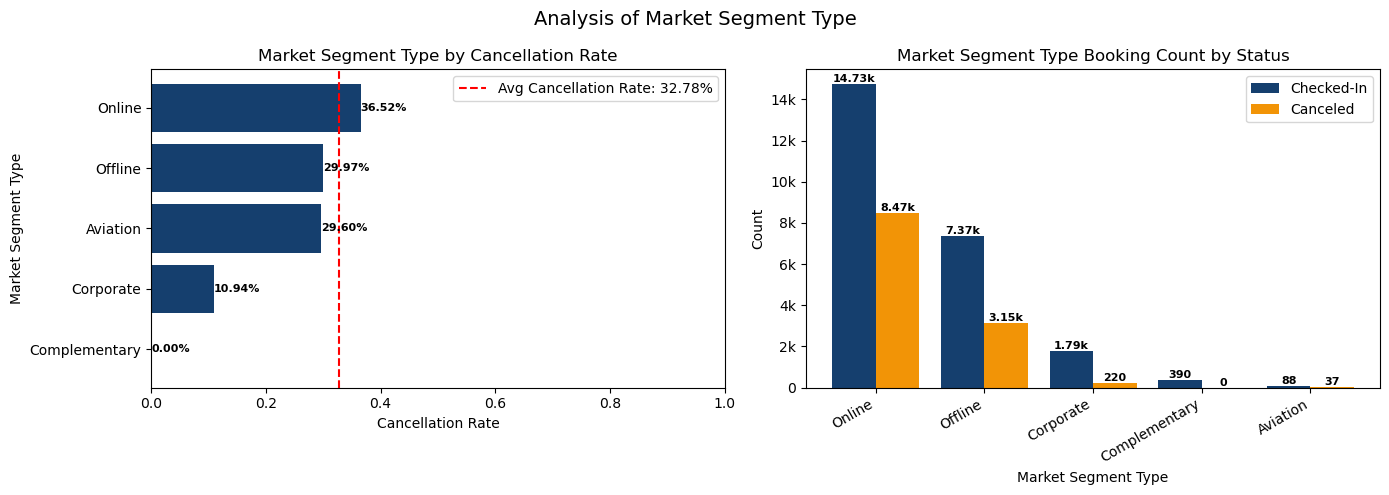

In [24]:
# Select categorical features
cat_cols = df.drop(columns=["booking status"]).select_dtypes(include=['category']).columns.tolist()

for col in cat_cols:
    # ────────────────────────────────────────────────
    # A) BUILD A NICER DISPLAY NAME
    # ────────────────────────────────────────────────
    col_display = col.replace('_', ' ').title()

    # ────────────────────────────────────────────────
    # B) Calculate cancellation rate by category
    # ────────────────────────────────────────────────
    df_rate = (
        df.groupby(col)['booking status']
          .mean()
          .reset_index(name='cancel_rate')
          .sort_values('cancel_rate', ascending=False)
    )
    col_avg_rate = df['booking status'].mean()
    
    df_plot = df_rate
    title_rate_barh = f'{col_display} by Cancellation Rate'
    title_rate_bar = f'{col_display} Booking Count by Status'

    # ────────────────────────────────────────────────
    # C) PLOTTING
    # ────────────────────────────────────────────────
    cat_order_rate = df_plot[col].tolist()
    rates_desc = df_plot['cancel_rate'].values

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'Analysis of {col_display}', fontsize=14)

    # -- ax1: cancellation-rate horizontal bars
    y_pos = np.arange(len(cat_order_rate))
    ax1.barh(y_pos, rates_desc, color="#153f6e")
    ax1.invert_yaxis()
    ax1.axvline(col_avg_rate, color="red", ls="--",
                label=f'Avg Cancellation Rate: {col_avg_rate*100:.2f}%')
    for i, rate in enumerate(rates_desc):
        ax1.text(rate, i, f'{rate*100:.2f}%', va='center', ha='left',
                 fontsize=8, weight='bold')
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(cat_order_rate)
    ax1.set_xlim(0, 1)
    ax1.set_xlabel('Cancellation Rate')
    ax1.set_ylabel(col_display)
    ax1.set_title(title_rate_barh)
    ax1.legend()

    # -- ax2: count bars (stacked by booking status)
    df_counts = (
        df.groupby([col, 'booking status'])
          .size()
          .reset_index(name='count')
          .query(f"`{col}` in @cat_order_rate")
    )
    df_sums = df_counts.groupby(col)['count'].sum().reset_index(name='total')
    cat_order_count = df_sums.sort_values('total', ascending=False)[col].tolist()

    x_pos, bar_w = np.arange(len(cat_order_count)), 0.4
    for status_val, offset, color, label in [
        (0, -bar_w/2, "#153f6e", 'Checked-In'),
        (1,  bar_w/2, "#f29406", 'Canceled')
    ]:
        counts = [
            df_counts.loc[(df_counts[col]==cat) & (df_counts['booking status']==status_val),
                          'count'].values[0] if
            ((df_counts[col]==cat)&(df_counts['booking status']==status_val)).any() else 0
            for cat in cat_order_count
        ]
        ax2.bar(x_pos + offset, counts, width=bar_w, color=color, label=label)

    # custom bar labels
    for container in ax2.containers:
        heights = [p.get_height() for p in container]
        labels = [f'{h:.0f}' if h < 1000 else f'{h/1000:.2f}'.rstrip('0').rstrip('.')+'k'
                  for h in heights]
        ax2.bar_label(container, labels=labels, fontsize=8, weight='bold')

    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(cat_order_count, rotation=30, ha='right')
    ax2.set_xlabel(col_display)
    ax2.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: f"{int(x)}" if x < 1000 else f"{x/1000:g}k")
    )
    ax2.set_ylabel('Count')
    ax2.set_title(title_rate_bar)
    ax2.legend()

    plt.tight_layout()
    plt.show()

## Part 3: Machine Learning Modelling

### Pre-Modelling

In [25]:
# separating the features from target label
X = df[['lead time', 'special requests', 'reservation_year', 'average price',
       'market segment type', 'repeated', 'number of week nights',
       'number of adults', 'car parking space', 'number of weekend nights',
       'P-not-C']]
y = df['booking status']

In [26]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Data Pre-Processing

In [27]:
# define pre-processing steps with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical Features', Pipeline([
            ('scaler', RobustScaler())
        ]), ['lead time', 'special requests', 'reservation_year', 'average price',
             'number of week nights', 'number of adults', 'car parking space',
             'number of weekend nights', 'P-not-C', 'repeated']),

        ('Categorical Features', Pipeline([
            ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), ['market segment type'])
    ]
)

### Modelling Without Hyperameter Tuning

In [28]:
# Define F2 Score as the evaluation metric
f2_scorer = make_scorer(fbeta_score, beta=2)

In [29]:
# Build the pipeline
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("feature_selection", SelectKBest(score_func=f_classif)),
    ("resampler", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier())      # placeholder; will be overwritten
])

# Create Search space for *feature_selection*, *resampler*, and *classifier*
param_grid = [{
    "feature_selection__k": np.arange(5,12,2),
    "resampler": [
        SMOTE(random_state=42),
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42)
    ],
     "classifier": [
        LogisticRegression(max_iter=500),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        LGBMClassifier(objective="binary", random_state=42, n_jobs=-1)
    ],
}]

# Run the grid search and time it
gscv_before_tuning = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring=f2_scorer,
    n_jobs=-1,
    error_score="raise",
    return_train_score=False
)

t0 = time.time()
gscv_before_tuning.fit(X_train, y_train)
print(f"Total GridSearchCV fit time: {time.time() - t0:.2f} s")

Total GridSearchCV fit time: 41.58 s


In [30]:
gscv_before_tuning

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('Numerical '
                                                                         'Features',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['lead '
                                                                          'time',
                                                                          'special '
                                                                          'requests',
                                                                          'reservation_year',
                                                                          'average '
                                                                          'price',
                                                                          'number '
                                                                          'of '
                                                                          'week '
                                                                          'nights',
                                                                          'number '
                                                                          'of '
                                                                          'adults',
                                                                          'car '
                                                                          'parking '
                                                                          'space',
                                                                          'number '
                                                                          'of '
                                                                          'weekend '
                                                                          'nights',
                                                                          '...
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None, ...),
                                         LGBMClassifier(n_jobs=-1,
                                                        objective='binary',
                                                        random_state=42)],
                          'feature_selection__k': array([ 5,  7,  9, 11]),
                          'resampler': [SMOTE(random_state=42),
                                        RandomOverSampler(random_state=42),
                                        RandomUnderSampler(random_state=42)]}],
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

#### Ranking `GridSearchCV` Result

In [31]:
def make_leaderboard(
    gscv,
    std_thresh: float = 0.10,
    time_thresh: float = 5.0
) -> pd.DataFrame:
    """
    Convert a fitted GridSearchCV object into a ranked Pandas DataFrame.

    Ranking logic
    -
    1. Any model whose `std_test_score` > `std_thresh` (default 0.10) incurs
       one penalty point.
    2. Any model whose `mean_score_time` > `time_thresh` seconds (default 5 s)
       incurs one penalty point.
    3. Models are sorted by, in order of priority:
         • Fewest penalty points  
         • Highest `mean_test_score`  
         • Lowest `std_test_score`  
         • Lowest `mean_score_time`
    4. A final **Overall Rank** column (1 = best) is added.

    Parameters
    -
    gscv : GridSearchCV
        A *fitted* GridSearchCV / RandomizedSearchCV object.
    std_thresh : float, optional
        Threshold beyond which a high *std_test_score* triggers a penalty.
    time_thresh : float, optional
        Threshold (seconds) beyond which a long *mean_score_time* triggers a penalty.

    Returns
    -
    pd.DataFrame
        Leaderboard with ranking, penalties, and key metrics.
    """
    # Convert cv_results_ to DataFrame and enrich with readable names
    results_df = pd.DataFrame(gscv.cv_results_)

    results_df["Classifier"] = results_df["param_classifier"].apply(
        lambda x: x if isinstance(x, str)                       # when the parameter is already a string
        else getattr(x, "__name__", x.__class__.__name__)       # function objects
    )

    results_df["Resampler"] = results_df["param_resampler"].apply(
        lambda x: x if isinstance(x, str)
        else getattr(x, "__name__", x.__class__.__name__)
    )

    # Keep relevant columns
    keep_cols = [
        "Classifier",
        "Resampler",
        "param_feature_selection__k",
        "mean_test_score",
        "std_test_score",
        "mean_score_time",
    ]

    summary = (
        results_df[keep_cols]
        .assign(cv_idx=results_df.index)     # ⬅ keep pointer into cv_results_
        .rename(columns={"param_feature_selection__k": "K"})
    )

    # 3. Apply penalties
    summary["Penalty"] = (
          (summary["std_test_score"]  > std_thresh).astype(int)
        + (summary["mean_score_time"] > time_thresh).astype(int)
    )

    # 4. Sort & rank
    leaderboard = (
        summary
        .sort_values(
            by=["Penalty", "mean_test_score", "std_test_score", "mean_score_time"],
            ascending=[True, False, True, True]
        )
        .reset_index(drop=True)
    )

    leaderboard.insert(0, "Overall Rank", leaderboard.index + 1)
    return leaderboard

In [32]:
# create leaderboard for model benchmarking (before hyperparameter tuning)
leaderboard_before_tuning = make_leaderboard(gscv_before_tuning, std_thresh=0.10, time_thresh=5.0)
leaderboard_before_tuning.head(10)

,Overall Rank,Classifier,Resampler,K,mean_test_score,std_test_score,mean_score_time,cv_idx,Penalty
0,1,RandomForestClassifier,RandomUnderSampler,11,0.830529,0.007960,0.191433,35,0
1,2,RandomForestClassifier,RandomUnderSampler,9,0.827275,0.005288,0.157054,32,0
2,3,XGBClassifier,RandomUnderSampler,11,0.820562,0.005382,0.054223,47,0
3,4,XGBClassifier,RandomUnderSampler,9,0.818887,0.004377,0.056791,44,0
4,5,XGBClassifier,SMOTE,11,0.818375,0.003656,0.048343,45,0
5,6,XGBClassifier,SMOTE,9,0.818046,0.000601,0.060262,42,0
6,7,XGBClassifier,RandomOverSampler,11,0.817196,0.005616,0.075074,46,0
7,8,RandomForestClassifier,SMOTE,11,0.816481,0.004304,0.273154,33,0
8,9,XGBClassifier,RandomUnderSampler,7,0.815991,0.005783,0.057961,41,0
9,10,XGBClassifier,RandomOverSampler,9,0.815925,0.004970,0.062557,43,0


#### Selecting the Two Best Models

In [33]:
# define a function to fit estimator using parameters taken from gridsearchcv.cv_results_
def fit_from_paramidx(gs, idx, X, y):
    """Clone gs.estimator, inject params from row *idx* of gs.cv_results_, and fit on (X, y)."""
    params = gs.cv_results_["params"][idx]
    est    = clone(gs.estimator)
    est.set_params(**params).fit(X, y)
    return est


# defiing a function to extract n number of estimators from the resulting gridsearchcv
def top_n_estimators(gs, leaderboard, X, y, n=2, unique_classifier=True):
    """
    Refit and return the *n* best parameter sets from *leaderboard*.

    Parameters
    -
    unique_classifier : bool
        If True (default) ensure each pick has a different classifier.
    """
    chosen, seen_cls = [], set()

    for _, row in leaderboard.iterrows():
        if unique_classifier and row["Classifier"] in seen_cls:
            continue

        chosen.append(row["cv_idx"])
        seen_cls.add(row["Classifier"])
        if len(chosen) == n:
            break

    return [fit_from_paramidx(gs, idx, X, y) for idx in chosen]

In [34]:
# select two models from the leaderboard with all of its accompanying 
best_estimator_before_tuning, second_best_estimator_before_tuning = top_n_estimators(
    gscv_before_tuning,
    leaderboard_before_tuning,
    X_train,
    y_train,
    n=2,                 # how many models to pick
    unique_classifier=True  # set to False if duplicates are acceptable
)

display(best_estimator_before_tuning)
display(second_best_estimator_before_tuning)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical Features',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['lead time',
                                                   'special requests',
                                                   'reservation_year',
                                                   'average price',
                                                   'number of week nights',
                                                   'number of adults',
                                                   'car parking space',
                                                   'number of weekend nights',
                                                   'P-not-C', 'repeated']),
                                                 ('Categorical Features',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['market segment type'])])),
                ('feature_selection', SelectKBest(k=11)),
                ('resampler', RandomUnderSampler(random_state=42)),
                ('classifier', RandomForestClassifier())])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical Features',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['lead time',
                                                   'special requests',
                                                   'reservation_year',
                                                   'average price',
                                                   'number of week nights',
                                                   'number of adults',
                                                   'car parking space',
                                                   'number of weekend nights',
                                                   'P-not-C', 'repeated']),
                                                 ('Categorical Features',
                                                  Pipeline(steps=[('one_hot_encod...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

#### Running the Two Best Models to Compare Evaluation Metrics

Best model (Before Hyperparameter Tuning): RandomForestClassifier
  F2‑score : 0.840
  Precision: 0.758
  Recall   : 0.863



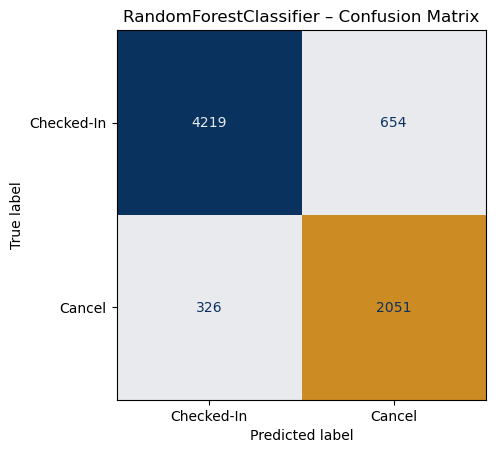

Runner‑up (Before Hyperparameter Tuning): XGBClassifier
  F2‑score : 0.827
  Precision: 0.760
  Recall   : 0.846



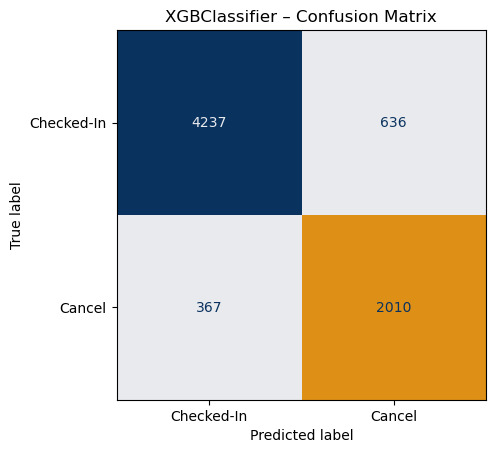

In [35]:
# Put both models in a dict for convenient looping
models = {
    "Best model (Before Hyperparameter Tuning)": best_estimator_before_tuning,
    "Runner‑up (Before Hyperparameter Tuning)": second_best_estimator_before_tuning
}

for label, model in models.items():
    # Predict on the hold‑out / test set
    y_pred = model.predict(X_test)
    
    # Classification metrics
    f2        = fbeta_score(y_test, y_pred, beta=2)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    
    # Print metric summary
    print(f"{label}: {model.named_steps['classifier'].__class__.__name__}")
    print(f"  F2‑score : {f2:.3f}")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall   : {recall:.3f}\n")
    
    # Confusion‑matrix plot
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        cmap=custom_cmap.reversed(),
        colorbar=False,
        display_labels=["Checked-In", "Cancel"]
    )
    plt.title(f"{model.named_steps['classifier'].__class__.__name__} – Confusion Matrix")
    plt.show()

### Modelling with Hyperparameter Tuning

#### Creating the Machine Learning Pipeline

In [36]:
# Build the pipeline
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("feature_selection", SelectKBest(score_func=f_classif)),
    ("resampler", SMOTE(random_state=42)),          # placeholder; will be overwritten
    ("classifier", RandomForestClassifier())        # placeholder; will be overwritten
])

#### Instantiating the Hyperparameter Grid

In [37]:
# Defining the parameter grid
param_grid = [
    # param grid for Random Forest (best model before tuning)
    {
        "feature_selection__k"              : [11],
        "resampler"                         : [RandomUnderSampler(random_state=42)],
        "classifier"                        : [RandomForestClassifier(random_state=42)],
        "classifier__n_estimators"          : [100, 200, 300],
        "classifier__max_depth"             : [10, 20, None],
        "classifier__min_samples_split"     : [2, 5],
        "classifier__max_features"          : ["sqrt", None],
        "classifier__class_weight"          : ["balanced", None]
    },
    # param grid for XGBoost (runner-up model before tuning)
    {
        "feature_selection__k"              : [11],
        "resampler"                         : [RandomUnderSampler(random_state=42)],
        "classifier"                        : [XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)],
        "classifier__n_estimators"          : [100, 200, 300],
        "classifier__learning_rate"         : [0.01, 0.1, 0.2],
        "classifier__max_depth"             : [3, 5, 7],
        "classifier__subsample"             : [0.8, 1.0],
        "classifier__colsample_bytree"      : [0.8, 1.0]
    }
]

#### Running the `GridSearchCV`

In [38]:
# Buat GridSearchCV dengan pipeline
gscv_after_tuning = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f2_scorer)

# Measure the start of fitting time
start_time = time.time()

# Fit GridSearchCV to train dataset
gscv_after_tuning.fit(X_train, y_train)

# Measure the end of fitting time
end_time = time.time()

# Calculate fitting time
fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")

Fitting time: 192.87 seconds


#### Creating a Leaderboard from the Resulting `GridSearchCV`

In [39]:
# create leaderboard from the resulting gridsearchcv results
leaderboard_after_tuning = make_leaderboard(gscv_after_tuning, std_thresh=0.1, time_thresh=5)
leaderboard_after_tuning.head()

,Overall Rank,Classifier,Resampler,K,mean_test_score,std_test_score,mean_score_time,cv_idx,Penalty
0,1,RandomForestClassifier,RandomUnderSampler,11,0.834917,0.007944,0.164524,63,0
1,2,RandomForestClassifier,RandomUnderSampler,11,0.834917,0.007944,0.186120,27,0
2,3,RandomForestClassifier,RandomUnderSampler,11,0.834352,0.006373,0.421933,65,0
3,4,RandomForestClassifier,RandomUnderSampler,11,0.834352,0.006373,0.539572,29,0
4,5,RandomForestClassifier,RandomUnderSampler,11,0.833971,0.007244,0.308216,64,0


#### Calculating the F2, Recall, Precision, and Confusion Matrix from the Resulting Best Model

In [40]:
# putting the best estimators from gscv_after_tuning into best_model variable
best_model = gscv_after_tuning.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical Features',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['lead time',
                                                   'special requests',
                                                   'reservation_year',
                                                   'average price',
                                                   'number of week nights',
                                                   'number of adults',
                                                   'car parking space',
                                                   'number of weekend nights',
                                                   'P-not-C', 'repeated']),
                                                 ('Categorical Features',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['market segment type'])])),
                ('feature_selection', SelectKBest(k=11)),
                ('resampler', RandomUnderSampler(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_split=5,
                                        random_state=42))])

In [41]:
# fitting and predicting y values of testing dataset using best estimators
best_model.fit(X_train, y_train)
best_model_pred = best_model.predict(X_test)

F2 score on test set: 0.8396
Recall score on test set: 0.8603
Precision score on test set: 0.7659


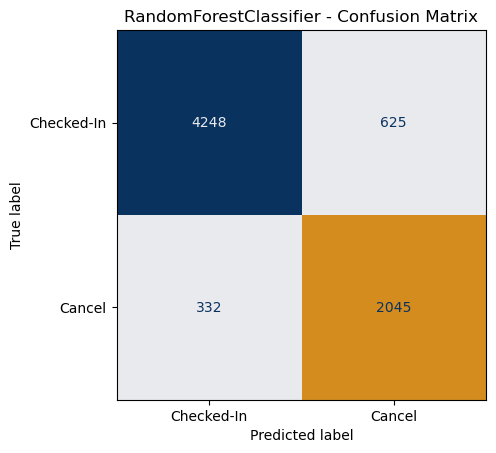

In [42]:
# print the metrics for the fine-tuned model
print("F2 score on test set:", f"{f2_scorer(best_model, X_test, y_test):.4f}")
print("Recall score on test set:", f"{recall_score(y_test, best_model_pred):.4f}")
print("Precision score on test set:", f"{precision_score(y_test, best_model_pred):.4f}")

# Plotting Confusion Matrix for the fine-tuned Best Model
ConfusionMatrixDisplay.from_predictions(
        y_test,
        best_model_pred,
        cmap=custom_cmap.reversed(),
        colorbar=False,
        display_labels=["Checked-In", "Cancel"]
    )

# Putting the title of the confusion matrix
plt.title(f"{best_model.named_steps['classifier'].__class__.__name__} - Confusion Matrix")

# Show the plot
plt.show()

### Modelling (Threshold Adjustment)

#### Iteratively Seeking the Best Probability Decision Threshold

In [43]:
# Get probability predictions from GradientBoosting
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Define different threshold values
thresholds = np.arange(0.1, 0.9, 0.01)

# Store F2 scores for different thresholds
f2_scores = []

for threshold in thresholds:
    y_pred_adjusted = (y_probs >= threshold).astype(int)
    f2 = fbeta_score(y_test, y_pred_adjusted, beta=2)
    f2_scores.append(f2)

In [44]:
# Find the best threshold with highest F2 Score
best_threshold = thresholds[np.argmax(f2_scores)]
best_f2_score = max(f2_scores)

# Apply the best threshold
y_pred_best_threshold = (y_probs >= best_threshold).astype(int)

# Print the best threshold and corresponding F2 Score
print(f"Best Decision Threshold: {best_threshold:.2f}")
print(f"Improved F2 Score: {best_f2_score:.4f}")
print(f"Recall Score for adjusted threshold: {recall_score(y_test, y_pred_best_threshold):.4f}")
print(f"Precision Score for adjusted threshold: {precision_score(y_test, y_pred_best_threshold):.4f}")

Best Decision Threshold: 0.39
Improved F2 Score: 0.8533
Recall Score for adjusted threshold: 0.9037
Precision Score for adjusted threshold: 0.6979


### Visualizing The Impact of Different Decision Thresholds on F2 Score

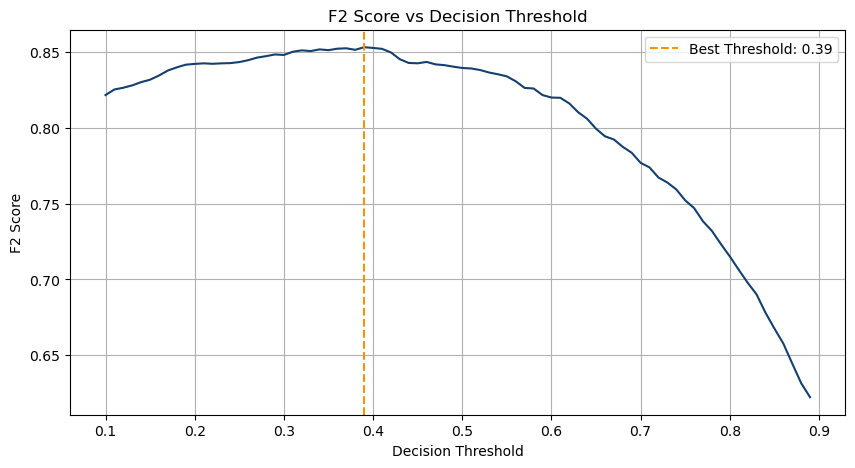

In [45]:
# Plot F2 Score vs Decision Threshold
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f2_scores, linestyle='-', color="#153f6e")
plt.axvline(x=best_threshold, color='#f29406', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel("Decision Threshold")
plt.ylabel("F2 Score")
plt.title("F2 Score vs Decision Threshold")
plt.legend()
plt.grid()
plt.show()

### Modelling (Implementing Adjusted Threshold)

#### Instantiating a Custom Wrapper Class

In [46]:
class AdjustedThresholdModel:
    def __init__(self, model, threshold):
        self.model = model
        self.threshold = threshold
    
    def predict(self, X):
        """Predict using adjusted threshold"""
        probabilities = self.model.predict_proba(X)[:, 1]  # Get probabilities for class 1
        return (probabilities >= self.threshold).astype(int)  # Apply threshold

    def predict_proba(self, X):
        """Return original probability scores"""
        return self.model.predict_proba(X)

#### Implementing the Custom Wrapper Class `AdjustedThresholdModel` on the Best Model

In [47]:
# Instantiate the modified model with the adjusted threshold
best_model_adjusted = AdjustedThresholdModel(best_model, best_threshold)
best_model_adjusted.model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical Features',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['lead time',
                                                   'special requests',
                                                   'reservation_year',
                                                   'average price',
                                                   'number of week nights',
                                                   'number of adults',
                                                   'car parking space',
                                                   'number of weekend nights',
                                                   'P-not-C', 'repeated']),
                                                 ('Categorical Features',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['market segment type'])])),
                ('feature_selection', SelectKBest(k=11)),
                ('resampler', RandomUnderSampler(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_split=5,
                                        random_state=42))])

#### Displaying the F2, Precision, Recall, and Confusion Matrix of the Adjusted Threshold Model

F2 Score with adjusted model: 0.8533
Recall Score with adjusted model: 0.9037
Precision Score with adjusted model: 0.6979


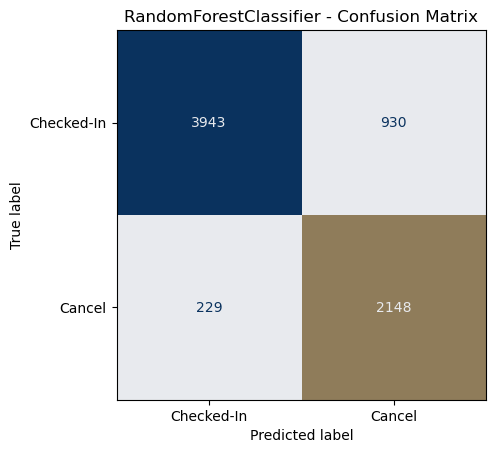

In [48]:
# Use the adjusted model to predict y values from test dataset
y_pred_adjusted = best_model_adjusted.predict(X_test)

# Print f2, recall, precision scores with new threshold
print(f"F2 Score with adjusted model: {f2_scorer(best_model_adjusted, X_test, y_test):.4f}")
print(f"Recall Score with adjusted model: {recall_score(y_test,y_pred_adjusted):.4f}")
print(f"Precision Score with adjusted model: {precision_score(y_test,y_pred_adjusted):.4f}")

# Plotting Confusion Matrix for Best Model
ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred_adjusted,
        cmap=custom_cmap.reversed(),
        colorbar=False,
        display_labels=["Checked-In", "Cancel"]
    )

# Putting the title of the confusion matrix
plt.title(f"{best_model_adjusted.model.named_steps['classifier'].__class__.__name__} - Confusion Matrix")

# Show the plot
plt.show()

## Part 4 - Model Evaluation

### Feature Evaluation

#### Feature Importance Bar Plot

In [49]:
# Get the output feature names from the ColumnTransformer step
preprocessor = best_model_adjusted.model.named_steps["preprocessor"]
all_features = preprocessor.get_feature_names_out()

# Identify which features were retained by SelectKBest
feature_selector = best_model_adjusted.model.named_steps["feature_selection"]
mask = feature_selector.get_support()
selected_features = all_features[mask]

# Retrieve feature importances from the GradientBoosting classifier
# Note: This works because the base estimator (DecisionTree) supports feature_importances_.
classifier = best_model_adjusted.model.named_steps["classifier"]
importances = classifier.feature_importances_

# Create a DataFrame to pair feature names with importance
fi_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": importances
}).sort_values("Importance", ascending=False).reset_index(drop=True)

# eliminating prefixes
fi_df['Feature'] = fi_df['Feature'].apply(
    lambda x: x.replace("Numerical Features__", "") if x.startswith("Numerical Features__") else x.split('__', maxsplit=1)[-1]
)

# displaying the resulting 
display(fi_df)

,Feature,Importance
0,lead time,0.425634
1,average price,0.238695
2,special requests,0.121661
3,number of week nights,0.064703
4,market segment type_Online,0.060769
5,reservation_year,0.034481
6,number of adults,0.027102
7,car parking space,0.011163
8,market segment type_Corporate,0.008576
9,repeated,0.006474


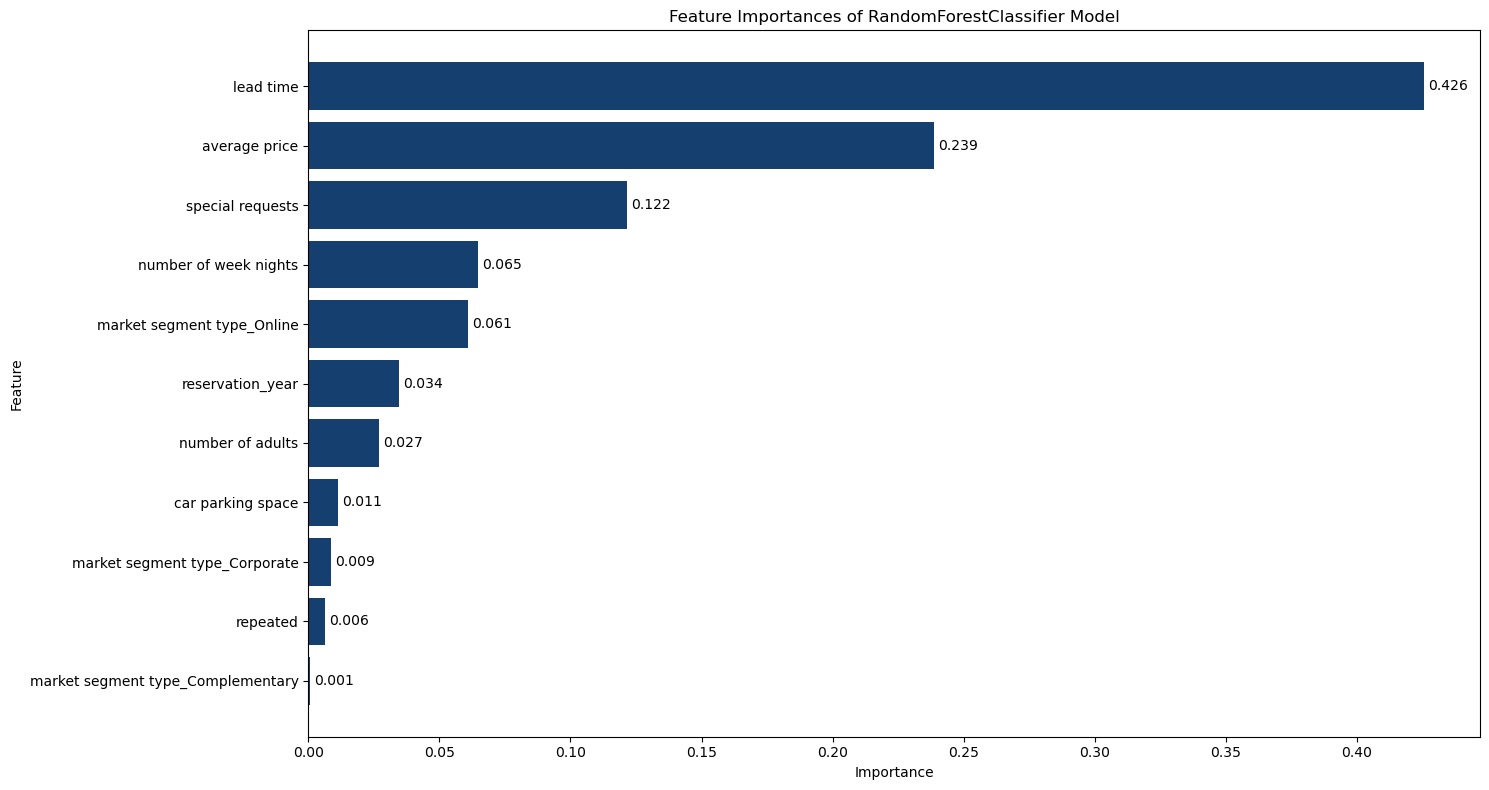

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))

# Plot horizontal bars
bars = ax.barh(fi_df["Feature"], fi_df["Importance"], color="#153f6e")

# Annotate each bar with its value
for bar in bars:
    width = bar.get_width()            # how long the bar is
    y_pos = bar.get_y() + bar.get_height() / 2  # halfway point of the bar on y-axis

    ax.annotate(
        f'{width:.3f}',
        xy=(width, y_pos),
        xytext=(3, 0),            # slight offset to the right
        textcoords="offset points",
        ha='left', va='center'    # horizontal alignment is to the left of the text position
    )

ax.set_xlabel("Importance")
ax.set_ylabel("Feature")
ax.set_title(f"Feature Importances of {best_model_adjusted.model.named_steps['classifier'].__class__.__name__} Model")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### SHAP Value

Calculating SHAP values... This may take a moment.
SHAP values calculated successfully!
Base values shape: (7250, 2)
SHAP values shape: (7250, 11, 2)

Detected binary classification - extracting class 1 (Canceled)
Final SHAP values shape: (7250, 11)
Features: 11



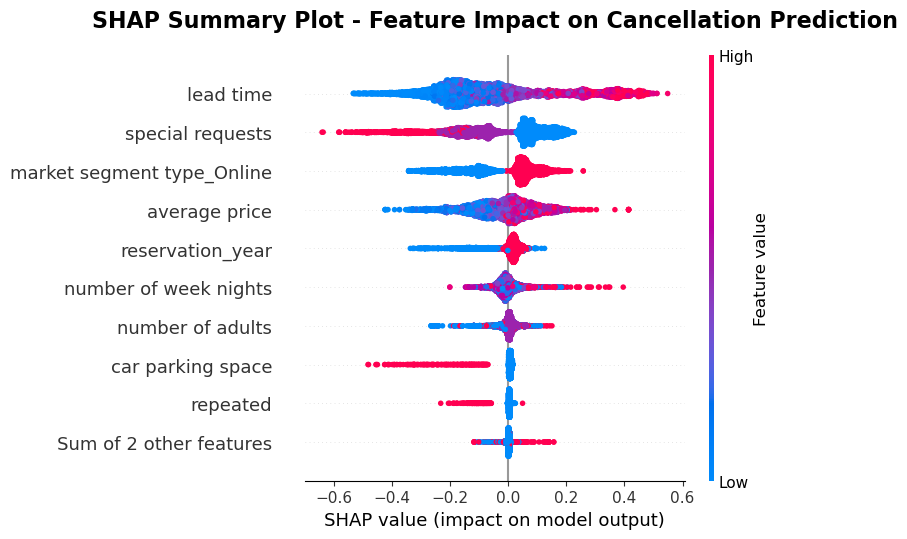


SHAP Beeswarm Plot Explanation:
• Features ranked by importance (top to bottom)
• Each dot represents one prediction from the test set
• X-axis: SHAP value (impact on model output)
• Color: Feature value (red = high, blue = low)
• Right side (positive): increases cancellation probability
• Left side (negative): decreases cancellation probability


In [51]:
# Unpack the Pipeline Steps
preprocessor = best_model_adjusted.model.named_steps['preprocessor']
selector     = best_model_adjusted.model.named_steps['feature_selection']
rf_model     = best_model_adjusted.model.named_steps['classifier']

# Transform the test data through preprocessing and feature selection
X_test_preprocessed = preprocessor.transform(X_test)
X_test_selected = selector.transform(X_test_preprocessed)

# Get feature names after preprocessing and selection
all_feature_names = preprocessor.get_feature_names_out()
mask = selector.get_support()
selected_feature_names = all_feature_names[mask]

# Clean feature names (remove prefixes)
def clean_name(name):
    if "__" in name:
        return name.split("__", 1)[1]
    return name

clean_feature_names = [clean_name(n) for n in selected_feature_names]

# Create DataFrame with clean names for SHAP
X_test_df = pd.DataFrame(X_test_selected, columns=clean_feature_names)

# Calculate SHAP values using TreeExplainer
print("Calculating SHAP values... This may take a moment.")
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test_df)

print(f"SHAP values calculated successfully!")
print(f"Base values shape: {shap_values.base_values.shape}")
print(f"SHAP values shape: {shap_values.values.shape}")

# For binary classification, select class 1 (Canceled)
# The shape is (n_samples, n_features, n_classes)
# We need to select [:, :, 1] for the positive class
if len(shap_values.values.shape) == 3:
    print(f"\nDetected binary classification - extracting class 1 (Canceled)")
    shap_values_class1 = shap.Explanation(
        values=shap_values.values[:, :, 1],
        base_values=shap_values.base_values[:, 1],
        data=shap_values.data,
        feature_names=clean_feature_names
    )
else:
    shap_values_class1 = shap_values

print(f"Final SHAP values shape: {shap_values_class1.values.shape}")
print(f"Features: {len(clean_feature_names)}\n")

# ============================================
# SHAP Beeswarm Plot
# ============================================
shap.plots.beeswarm(shap_values_class1, show=False)
plt.title("SHAP Summary Plot - Feature Impact on Cancellation Prediction", 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nSHAP Beeswarm Plot Explanation:")
print("=" * 70)
print("• Features ranked by importance (top to bottom)")
print("• Each dot represents one prediction from the test set")
print("• X-axis: SHAP value (impact on model output)")
print("• Color: Feature value (red = high, blue = low)")
print("• Right side (positive): increases cancellation probability")
print("• Left side (negative): decreases cancellation probability")

### Business Outcome Evaluation

In [52]:
def calc_business_costs_hotels_v2(y_true, y_pred, X_test, scenario_name, fp_factor=0.25):
    """
    Business outcome evaluation (Hotel RM perspective).
    FN = full revenue loss (unsold rooms).
    FP = fp_factor × ADR × nights (fixed proportion, here = 0.25).
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    nights = X_test["number of week nights"] + X_test["number of weekend nights"]
    adr = X_test["average price"]

    fn_mask = (y_true == 1) & (y_pred == 0)
    fp_mask = (y_true == 0) & (y_pred == 1)

    # FN cost: lost revenue
    fn_cost = (adr[fn_mask] * nights[fn_mask]).sum()

    # FP cost: fixed proportion of ADR
    fp_cost = (adr[fp_mask] * nights[fp_mask] * fp_factor).sum()

    total_cost = fn_cost + fp_cost

    return {
        "Scenario": scenario_name,
        "FN Count": fn,
        "FP Count": fp,
        "Total FN Cost": round(fn_cost, 2),
        "Total FP Cost": round(fp_cost, 2),
        "Total Cost": round(total_cost, 2)
    }


=== Business Outcome Evaluation (FP factor=0.25) ===


,Scenario,FN Count,FP Count,Total FN Cost,Total FP Cost,Total Cost,% Cost Saved vs No-Model
0,No-Model,2377,0,852276.23,0.00,852276.23,0.00
1,Before Tuning,326,654,111310.81,56673.20,167984.01,80.29
2,After Tuning + Threshold Adj.,229,930,76855.14,82266.27,159121.41,81.33


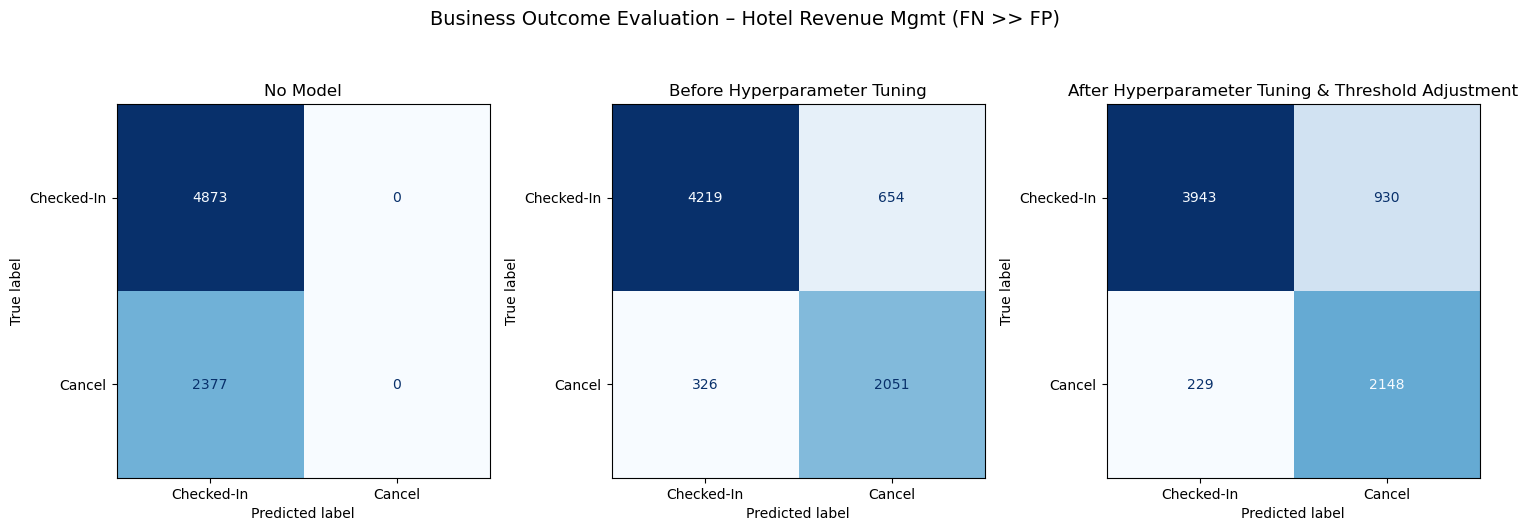

In [53]:
# === Applications in three scenarios ===
results = []

# 1. No Model
y_pred_nomodel = np.zeros_like(y_test)
results.append(calc_business_costs_hotels_v2(y_test, y_pred_nomodel, X_test, "No-Model"))

# 2. Before Tuning
y_pred_before = best_estimator_before_tuning.predict(X_test)
results.append(calc_business_costs_hotels_v2(y_test, y_pred_before, X_test, "Before Tuning"))

# 3. After Tuning + Threshold Adj.
y_pred_after = best_model_adjusted.predict(X_test)
results.append(calc_business_costs_hotels_v2(y_test, y_pred_after, X_test, "After Tuning + Threshold Adj."))

# Results table
business_df = pd.DataFrame(results)

# Calculate the percentage savings compared to the No-Model scenario.
baseline_cost = business_df.loc[business_df["Scenario"]=="No-Model","Total Cost"].values[0]
business_df["% Cost Saved vs No-Model"] = ((baseline_cost - business_df["Total Cost"]) / baseline_cost * 100).round(2)

print("\n=== Business Outcome Evaluation (FP factor=0.25) ===")
display(business_df)

# Plot the confusion matrix comparison
fig, axes = plt.subplots(1, 3, figsize=(15,5))
scenarios = {
    "No Model": (y_test, y_pred_nomodel),
    "Before Hyperparameter Tuning": (y_test, y_pred_before),
    "After Hyperparameter Tuning & Threshold Adjustment": (y_test, y_pred_after),
}

for ax, (title, (yt, yp)) in zip(axes, scenarios.items()):
    ConfusionMatrixDisplay.from_predictions(
        yt, yp, cmap="Blues", colorbar=False,
        display_labels=["Checked-In", "Cancel"], ax=ax
    )
    ax.set_title(title)

plt.suptitle("Business Outcome Evaluation – Hotel Revenue Mgmt (FN >> FP)", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()